In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import os
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
sys.path.append('../..')
from src.data.functions import safe_log, convert_datetime
from src.utils.directories import get_parent_directory

In [4]:
parent_dir = get_parent_directory()
ascos_nc = os.path.join(parent_dir, "data/interim/ASCOS_data.nc")
ascos_ds = xr.open_dataset(ascos_nc)

In [7]:
ascos_ds

<xarray.Dataset>
Dimensions:    (time: 345, depth: 500, latlon: 345)
Coordinates:
  * time       (time) float64 228.8 229.4 229.4 229.5 ... 244.8 244.9 244.9
  * depth      (depth) float64 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Dimensions without coordinates: latlon
Data variables:
    latitude   (latlon) float64 ...
    longitude  (latlon) float64 ...
    P          (time, depth) float64 ...
    T          (time, depth) float64 ...
    S          (time, depth) float64 ...
    SIGTH      (time, depth) float64 ...
    epsilon    (time, depth) float64 ...

In [16]:
formatted_ds = ascos_ds.rename_vars({"epsilon": "eps"})
formatted_ds.rename({"latlon": "profile"})

<xarray.Dataset>
Dimensions:    (time: 345, depth: 500, profile: 345)
Coordinates:
  * time       (time) float64 228.8 229.4 229.4 229.5 ... 244.8 244.9 244.9
  * depth      (depth) float64 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Dimensions without coordinates: profile
Data variables:
    latitude   (profile) float64 87.47 87.48 87.48 87.48 ... 87.18 87.17 87.17
    longitude  (profile) float64 -5.993 -6.708 -6.747 ... -9.976 -10.04 -10.07
    P          (time, depth) float64 ...
    T          (time, depth) float64 ...
    S          (time, depth) float64 ...
    SIGTH      (time, depth) float64 ...
    eps        (time, depth) float64 ...

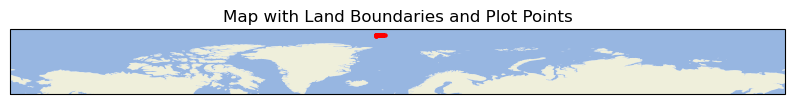

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(ascos_ds.longitude, ascos_ds.latitude, transform=ccrs.PlateCarree(), color='red', s=5)

# Add land, ocean, and borders
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))

ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.set_title("Map with Land Boundaries and Plot Points")
plt.show()